[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for NIFTY50 and TATA MOTORS...
NIFTY50 Columns: MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])
TATA MOTORS Columns: MultiIndex([( 'Close', 'TATAMOTORS.NS'),
            (  'High', 'TATAMOTORS.NS'),
            (   'Low', 'TATAMOTORS.NS'),
            (  'Open', 'TATAMOTORS.NS'),
            ('Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])

--- Results ---
Alpha: 0.002494182222248187
Beta: 1.0940495680506135
TATA MOTORS Sharpe Ratio: 3.5586051986687766
NIFTY50 Sharpe Ratio: 1.9644009722829596
TATA MOTORS Max Drawdown: [0.0951121]
NIFTY50 Max Drawdown: [0.06611908]


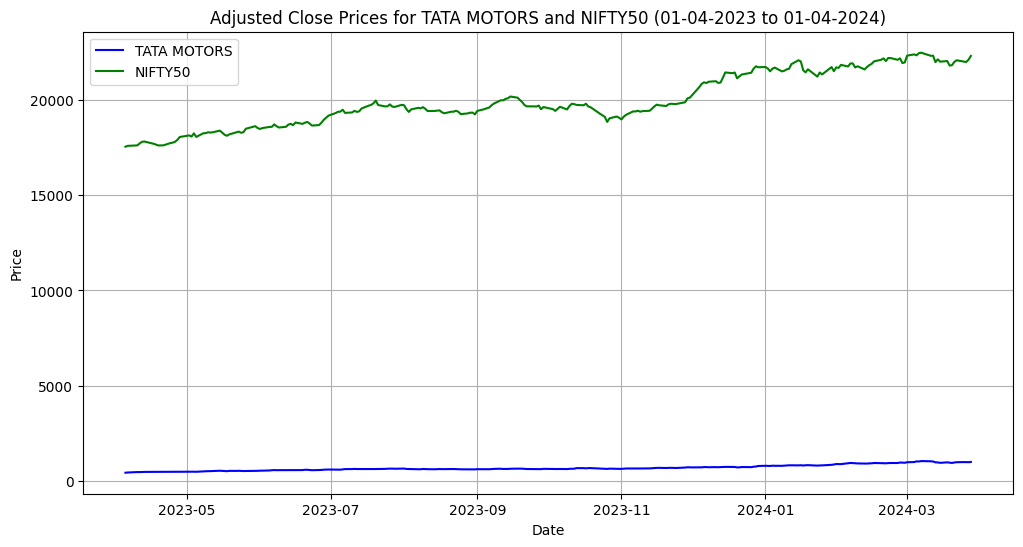

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
start_date = "2023-04-01"
end_date = "2024-04-01"
risk_free_rate = 0.07015  # Annualized risk-free rate (7.015%)
annual_factor = np.sqrt(252)  # Annualization factor assuming 252 trading days in a year

# Fetch Historical Data
print("Fetching data for NIFTY50 and TATA MOTORS...")
nifty50 = yf.download("^NSEI", start=start_date, end=end_date)
tatamotors = yf.download("TATAMOTORS.NS", start=start_date, end=end_date)

# Validate Data
if nifty50.empty or tatamotors.empty:
    raise ValueError("Data fetch failed. Check ticker symbols, internet connection, or date range.")

# Display available columns for debugging
print("NIFTY50 Columns:", nifty50.columns)
print("TATA MOTORS Columns:", tatamotors.columns)

# Use 'Adj Close' if available; otherwise, fallback to 'Close'
price_col = 'Adj Close' if 'Adj Close' in nifty50.columns else 'Close'

# Compute Daily Returns
nifty50['Returns'] = nifty50[price_col].pct_change()
tatamotors['Returns'] = tatamotors[price_col].pct_change()

# Drop NaN values
nifty50 = nifty50.dropna()
tatamotors = tatamotors.dropna()

# Calculate Alpha and Beta (Market Regression)
X = nifty50['Returns'].values
Y = tatamotors['Returns'].values
beta, alpha = np.polyfit(X, Y, 1)

# Calculate Sharpe Ratios
tatamotors_mean = tatamotors['Returns'].mean()
tatamotors_std = tatamotors['Returns'].std()
tatamotors_sharpe = ((tatamotors_mean - risk_free_rate / 252) / tatamotors_std) * annual_factor

nifty50_mean = nifty50['Returns'].mean()
nifty50_std = nifty50['Returns'].std()
nifty50_sharpe = ((nifty50_mean - risk_free_rate / 252) / nifty50_std) * annual_factor

# O(n) Max Drawdown Calculation
def max_drawdown(prices):
    """
    Calculate the maximum drawdown in O(n) time complexity.
    :param prices: A list, NumPy array, or Pandas Series of price data.
    :return: Maximum drawdown as a float.
    """
    prices = np.array(prices)  # Ensure input is a NumPy array for compatibility
    peak = prices[0]  # Initialize the first price as the initial peak
    drawdown = 0.0

    for price in prices:
        if price > peak:
            peak = price  # Update the peak
        drawdown = max(drawdown, (peak - price) / peak)

    return drawdown


tatamotors_prices = tatamotors[price_col].dropna().values
nifty50_prices = nifty50[price_col].dropna().values

# Calculate Max Drawdown
tatamotors_drawdown = max_drawdown(tatamotors_prices)
nifty50_drawdown = max_drawdown(nifty50_prices)

# Print Results
print("\n--- Results ---")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print(f"TATA MOTORS Sharpe Ratio: {tatamotors_sharpe}")
print(f"NIFTY50 Sharpe Ratio: {nifty50_sharpe}")
print(f"TATA MOTORS Max Drawdown: {tatamotors_drawdown}")
print(f"NIFTY50 Max Drawdown: {nifty50_drawdown}")

# Plot Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(tatamotors[price_col], label="TATA MOTORS", color='blue')
plt.plot(nifty50[price_col], label="NIFTY50", color='green')
plt.title("Adjusted Close Prices for TATA MOTORS and NIFTY50 (01-04-2023 to 01-04-2024)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
